
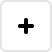
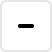
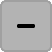
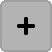
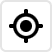
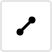
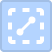
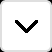
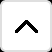
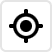
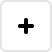
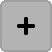
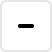
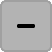
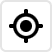
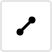
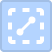
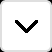
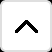
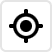

In [1]:
import numpy as np
import pandas as pd
from lets_plot import *
LetsPlot.setup_html()

In [2]:
np.random.seed(42)

In [3]:
n = 50
x = np.arange(n)
y = x + np.random.normal(scale=10, size=n)


In [6]:
ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + \
    geom_point() + geom_smooth() + geom_stat_r2(labels=layer_labels().line('\(R\\^2 = @{..r2..}\)').line('\(f(x) = @{..formula..}\)'))

In [7]:
n = 100
g = np.random.choice(['a', 'b'], size=100)
x = np.linspace(-2, 2, n)
y = x ** 2 + np.random.normal(size=n)

In [8]:
ggplot({'x': x, 'y': y, 'group': g}, aes(x='x', y='y', group='group')) + \
    geom_point(aes(color='group')) + \
    geom_smooth(aes(color='group'), deg=2, se=False) + \
    geom_stat_r2(aes(color='group'), deg=2, se=False, \
                 labels=layer_labels().line('@{..r2..}').line('@{..formula..}').inherit_color())

In [9]:
t = np.linspace(0, 1, 100)
mean = 1 + np.zeros(2)
cov = np.eye(2)
x, y = np.random.multivariate_normal(mean, cov, t.size).T
df = pd.DataFrame({'t': t, 'x': x, 'y': y})
df = df.melt(id_vars=['t'], value_vars=['x', 'y'])

In [10]:
ggplot(df, aes(x='t', y='value', group='variable')) + \
    geom_point(aes(color='variable'), size=3, alpha=.5) + \
    geom_smooth(aes(color='variable'), size=1, method='loess', span=.3, level=.7, seed=42) + \
    geom_stat_r2(aes(color='variable'), size=1, method='loess', span=.3, level=.7, seed=42, \
                 labels=layer_labels().line('@{..r2..}').line('(@{..formula..})').inherit_color())

In [11]:
data = {'name': ['a', 'b', 'c', 'd', 'b'], 'value': [40, 90, 10, 50, 20]}
ggplot(data) + geom_pie(aes(fill=as_discrete('name', order_by='..count..'), weight='value'), \
                        size=15, hole=0.2, \
                        labels=layer_labels(['..proppct..']).format('..proppct..', '{.1f}%'))